In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [5]:
image_path = "../output_images/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

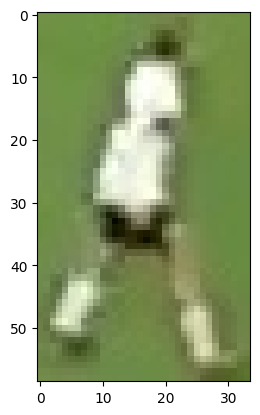

In [6]:
plt.imshow(image)
plt.show()

# Take Top Half of Image

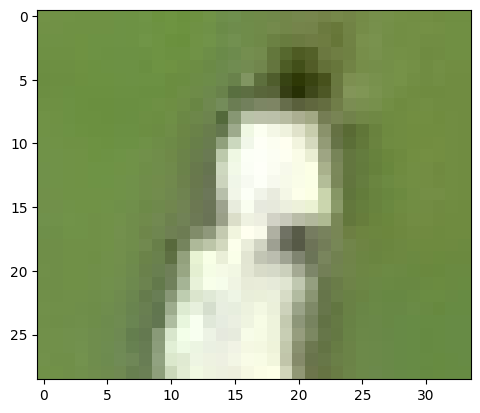

In [7]:
top_half = image[0 : int(image.shape[0] / 2), :]
plt.imshow(top_half)
plt.show()
image = image

# Cluster The Image Into Two Clusters

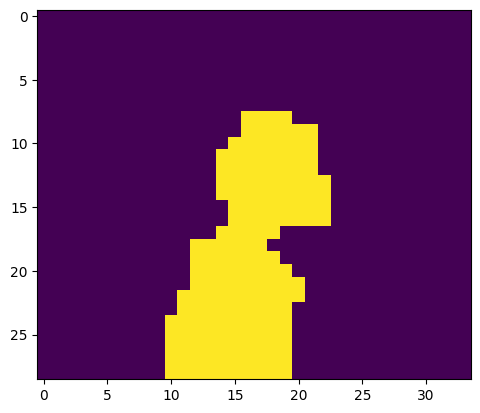

In [9]:
# Reshape the image into 2d array
image_2d = top_half.reshape(-1, 3)

# Perform KMeans clustering
kmeans =  KMeans(n_clusters = 2, random_state = 0).fit(image_2d)

# Get cluster labels
labels = kmeans.labels_

# Reshape the labels into the original image shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# Display results
plt.imshow(clustered_image)
plt.show()

How do we know which is the background and which is the shirt? 
It is likely that whatever appears in the 4 corners of the image will be a part of the background. Therefore, we find the class at each of the corners and whichever is more abundant is likely to be the class of the background.

In [9]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
background_cluster = max(set(corner_clusters), key = corner_clusters.count)

print(background_cluster)

0


In [10]:
player_cluster = 1 - background_cluster
print(player_cluster)

1


In [12]:
kmeans.cluster_centers_[player_cluster]

array([228.61988304, 233.98830409, 213.66081871])